In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from quantipy.assets import Currency, Equity
from quantipy.trading import Strategy, Broker
from quantipy.trading import MovingAverage, DoubleMovingAverage, TripleMovingAverage
from quantipy.backtest import Backtester

In [2]:
# backtest period
BACKTEST_START = '2018-01-01'
LIVE_START = '2022-01-01'

# trading universe
CAPITAL = 10_000
eur = Currency('EUR')
asml = Equity('ASML', 'ASML')
MKT = [asml]

# strategy
STRATEGY = TripleMovingAverage(MKT, {})

# strategy parameters
PARAMS = {
    'history1': [3, 4, 5, 6], 
    'history2': [7, 9, 10, 12, 15],
    'history3': [21, 24, 27, 30]
}
TARGET = 'final_equity'

In [3]:
# getting data
data = {}
for asset in MKT:
    ticker = yf.ticker.Ticker(asset.symbol)
    ticker_data = ticker.history(start=BACKTEST_START, end=LIVE_START,
                                 interval='1d')
    data[asset.symbol] = ticker_data

broker = Broker(data=data, initial_capital=CAPITAL, currency=eur)
backtester = Backtester(data)

opt_results = backtester.optimize(
    STRATEGY, broker, PARAMS, target=TARGET, save_logs=False
)

opt_results['best_params']

{'history1': 3, 'history2': 7, 'history3': 21}
Score: 12435.69625765194
{'history1': 3, 'history2': 7, 'history3': 24}


/home/luissimaoaf/self/dev/quantipy/quantipy/backtest.py:116: RuntimeWarning: divide by zero encountered in log
  results['log_returns'] = np.log(results['returns'])
/home/luissimaoaf/self/dev/quantipy/quantipy/backtest.py:116: RuntimeWarning: invalid value encountered in log
  results['log_returns'] = np.log(results['returns'])


Score: 12435.69625765194
{'history1': 3, 'history2': 7, 'history3': 27}
Score: 12435.69625765194
{'history1': 3, 'history2': 7, 'history3': 30}
Score: 12435.69625765194
{'history1': 3, 'history2': 9, 'history3': 21}
Score: 12316.308176404567
{'history1': 3, 'history2': 9, 'history3': 24}
Score: 12316.308176404567
{'history1': 3, 'history2': 9, 'history3': 27}
Score: 12316.308176404567
{'history1': 3, 'history2': 9, 'history3': 30}
Score: 12316.308176404567
{'history1': 3, 'history2': 10, 'history3': 21}
Score: 13634.9263949686
{'history1': 3, 'history2': 10, 'history3': 24}
Score: 13634.9263949686
{'history1': 3, 'history2': 10, 'history3': 27}
Score: 13634.9263949686
{'history1': 3, 'history2': 10, 'history3': 30}
Score: 13634.9263949686
{'history1': 3, 'history2': 12, 'history3': 21}
Score: 17242.92959842104
{'history1': 3, 'history2': 12, 'history3': 24}
Score: 17242.92959842104
{'history1': 3, 'history2': 12, 'history3': 27}
Score: 17242.92959842104
{'history1': 3, 'history2': 12, 

{'history1': 5, 'history2': 12, 'history3': 21}

/tmp/ipykernel_215063/91267208.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nprice = np.array(data['ASML']['Close'])*10000/data['ASML']['Close'][0]


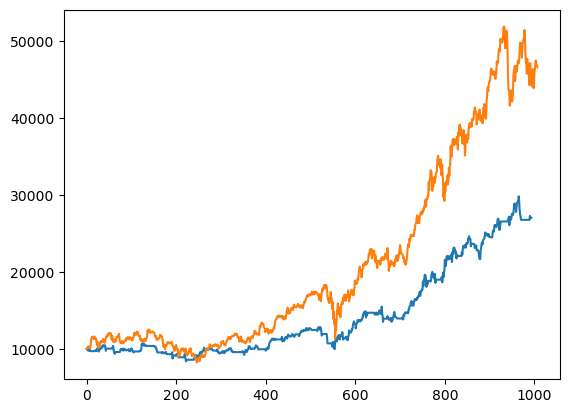

In [4]:
plt.plot(opt_results['equity'])
nprice = np.array(data['ASML']['Close'])*10000/data['ASML']['Close'][0]
plt.plot(nprice)

In [5]:
# getting data
data = {}
for asset in MKT:
    ticker = yf.ticker.Ticker(asset.symbol)
    ticker_data = ticker.history(start=LIVE_START, interval='1d')
    data[asset.symbol] = ticker_data

STRATEGY.params = opt_results['best_params']
capital = opt_results['final_equity']
broker = Broker(data=data, initial_capital=capital, currency=eur)
live_backtester = Backtester(data)

live_backtester.run(STRATEGY, broker, save_logs=True)
results = live_backtester.process_results(rolling=52)

/home/luissimaoaf/self/dev/quantipy/quantipy/backtest.py:116: RuntimeWarning: divide by zero encountered in log
  results['log_returns'] = np.log(results['returns'])
/home/luissimaoaf/self/dev/quantipy/quantipy/backtest.py:116: RuntimeWarning: invalid value encountered in log
  results['log_returns'] = np.log(results['returns'])


/tmp/ipykernel_215063/4045054279.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(np.array(data['ASML']['Close'][15:])/data['ASML']['Close'][15])


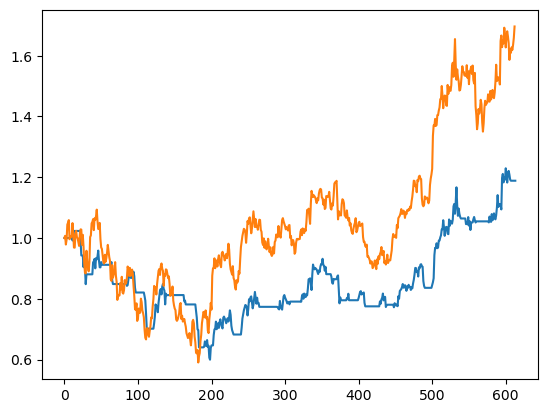

In [6]:
plt.figure()
plt.plot(results['equity']/capital)
plt.plot(np.array(data['ASML']['Close'][15:])/data['ASML']['Close'][15])

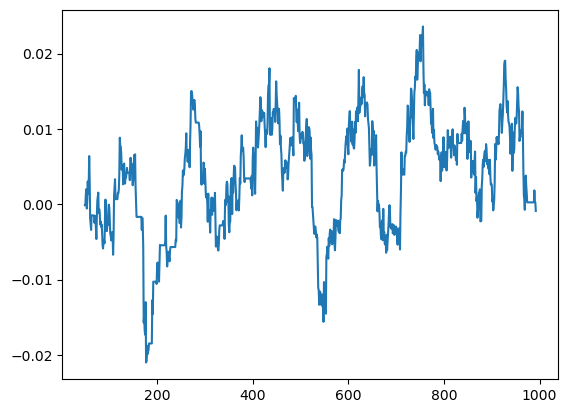

In [11]:
plt.plot(1/opt_results['rolling_sharpe'])